### 概要

ロジスティック回帰は線形分離問題と2値分類問題に対する単純ながらより強力なアルゴリズムであり、回帰ではなく分類のモデル<br>
但し、線形分離可能なクラスにのみ高い性能が発揮される.ロジスティック回帰を図にすると下記のとおり

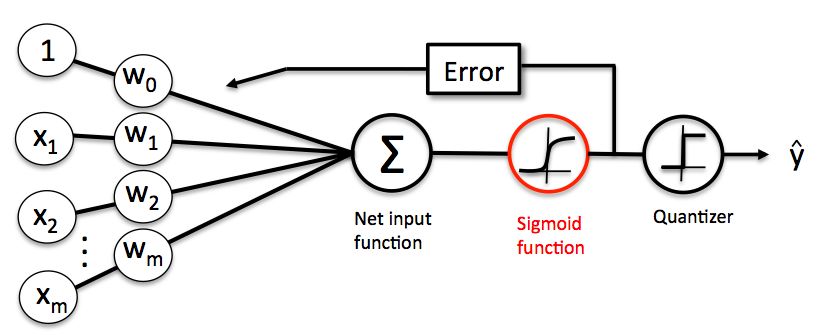

In [4]:
from IPython.display import Image
Image(filename='./images/03_03.png', width=500) 

### シグモイド関数

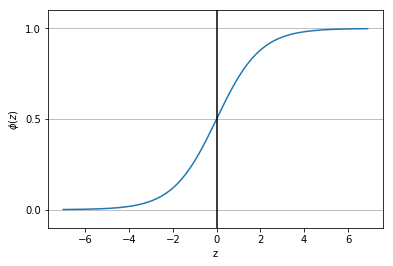

In [5]:
import matplotlib.pyplot as plt
import numpy as np

#シグモイド関数を定義
def sigmoid(z):
    return 1.0 / (1.0+np.exp(-z))

#0.1間隔で-7以上7未満のデータを作成
z = np.arange(-7,7,0.1)
#生成したデータでシグモイド関数を実行
phi_z = sigmoid(z)
#元のデータとシグモイド関数の出力をプロット
plt.plot(z,phi_z)
#垂直線を追加（z=0）
plt.axvline(0.0,color='k')
#y軸の上限/下限を設定
plt.ylim(-0.1,1.1)
#軸のラベルを設定
plt.xlabel('z')
plt.ylabel('$\phi(z)$')
#y軸の目盛を追加
plt.yticks([0.0,0.5,1.0])
#Axesクラスのオブジェクトの取得
ax = plt.gca()
#y軸の目盛に合わせて水平グリッド線を追加
ax.yaxis.grid(True)
#グラフを表示
plt.show()

### コスト関数

下の関数が最小化するように重さを更新する<br>
$J(w)=-\Sigma_iy{(i)}log(\phi(z^{(i)}))+(1-y^{(i)})log(1-\phi(z^{(i)}))$<br>
yの値により下記のようになる<br>
$
\begin{eqnarray}
\left\{
\begin{array}{l}
-log(\phi(z))   (y = 1) \newline
-log(1-\phi(z)) (y = 0)
\end{array}
\right.
\end{eqnarray}
$
この関数は下のように正しく判別できた場合のコストは0になり、それ以外は無限大に向かう

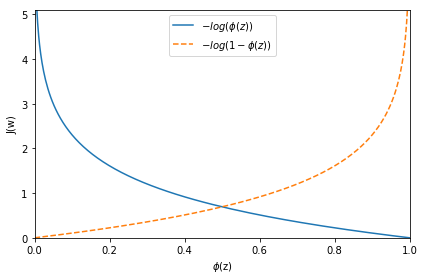

In [6]:
def cost_1(z):
    return - np.log(sigmoid(z))


def cost_0(z):
    return - np.log(1 - sigmoid(z))

z = np.arange(-10, 10, 0.1)
phi_z = sigmoid(z)

c1 = [cost_1(x) for x in z]
plt.plot(phi_z, c1, label='$-log(\phi(z))$')

c0 = [cost_0(x) for x in z]
plt.plot(phi_z, c0, linestyle='--', label='$-log(1-\phi(z))$')

plt.ylim(0.0, 5.1)
plt.xlim([0, 1])
plt.xlabel('$\phi$(z)')
plt.ylabel('J(w)')
plt.legend(loc='best')
plt.tight_layout()
# plt.savefig('./figures/log_cost.png', dpi=300)
plt.show()

### 実装

sklearn_modelを使った実装とSGDClassifierを使った実装がある<br>
sklearn_modelを使った実装だと高速化できるがデータセットが大きすぎてコンピュータのメモリに収まらないことがある<br>
SGDClassifierを使った実装だと、確率的勾配降下法アルゴリズムに似た実装がされている<br>
(オンライン学習についてもpartial_fitメソッドで対応している)

#### sklearn_modelを使った実装

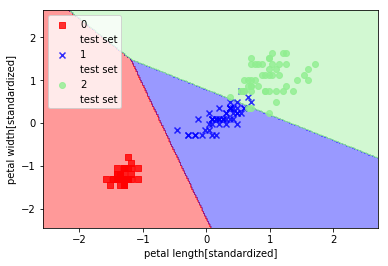

In [12]:
from sklearn.linear_model import LogisticRegression
#ロジスティック回帰のインスタンスを生成
lr = LogisticRegression(C=100.0,random_state=0)
#トレーニングデータをモデルに適合させる
lr.fit(X_train_std,y_train)
#決定境界をプロット
plot_decision_regions(X_combined_std,y_combined,classifier=lr,test_idx=range(105,150))
#軸のラベルを設定
plt.xlabel('petal length[standardized]')
plt.ylabel('petal width[standardized]')
#凡例を設定
plt.legend(loc='upper left')
#グラフを表示
plt.show()

In [15]:
y_pred = lr.predict(X_test_std)
print('Misclassified samples:%d' % (y_test != y_pred).sum())

Misclassified samples:1


#### SGDClassifierを使った実装

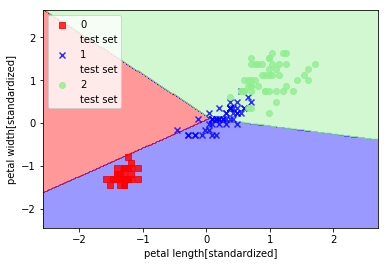

In [13]:
from sklearn.linear_model import SGDClassifier
#確率降下法バージョンのロジスティック回帰を生成
sgd_lr = SGDClassifier(loss='log')
#トレーニングデータをモデルに適合させる
sgd_lr.fit(X_train_std,y_train)
#決定境界をプロット
plot_decision_regions(X_combined_std,y_combined,classifier=sgd_lr,test_idx=range(105,150))
#軸のラベルを設定
plt.xlabel('petal length[standardized]')
plt.ylabel('petal width[standardized]')
#凡例を設定
plt.legend(loc='upper left')
#グラフを表示
plt.show()

In [16]:
y_pred = sgd_lr.predict(X_test_std)
print('Misclassified samples:%d' % (y_test != y_pred).sum())

Misclassified samples:28


### その他の関数

In [9]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X,y,classifier,test_idx=None,resolution=0.02):
    #マーカとカラーマップの準備
    markers = ('s','x','o','^','v')
    colors = ('red','blue','lightgreen','gray','cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    #決定領域をプロット
    x1_min,x1_max = X[:,0].min() - 1,X[:,0].max() + 1
    x2_min,x2_max = X[:,1].min() - 1,X[:,1].max() + 1
    
    #グリッドポイントの生成
    xx1,xx2 = np.meshgrid(np.arange(x1_min,x1_max,resolution), \
                         np.arange(x2_min,x2_max,resolution))
    
    #各特徴量を1智元配列に変換して予測を実行
    Z= classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    
    #予測結果をもとのグリッドポイントのデータベースに変換
    Z = Z.reshape(xx1.shape)
    
    #グリッドポイントの等高線のプロット
    plt.contourf(xx1,xx2,Z,alpha=0.4,cmap=cmap)
    
    #軸の範囲の設定
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())
    
    #クラスごとにサンプルをプロット
    for idx,cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl,0],y=X[y == cl,1], \
                   alpha=0.8,c=cmap(idx),marker=markers[idx],label=cl)
    
    #テストサンプルを目出させる（展を●で表示）
        if test_idx:
            X_test,y_test = X[test_idx,:],y[test_idx]
            plt.scatter(X_test[:,0],X_test[:,1],c='', \
                        alpha=1.0,linewidths=1,marker='o',s=55,label='test set')

In [10]:
#テストデータとトレインデータの分類
#sklearnで用意されている関数を使って分類する
from sklearn import datasets
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler

#Irisデータセットをロード
iris = datasets.load_iris()

#3列目4列目の特徴量を抽出
X = iris.data[:,[2,3]]
#クラスラベルを取得
y = iris.target

#トレーニングデータとテストデータに分類
#sklearnで用意されている関数を使って分離する
#全体の30%をテストデータにする
X_train,X_test,y_train,y_test = train_test_split(\
                                                X,y,test_size=0.3,random_state=0)

#StandardScalerをつかって、トレーニングデータを標準化
sc = StandardScaler()
#トレーニングデータの平均と標準偏差を計算
sc.fit(X_train)
#平均と標準偏差を用いて標準化
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

#トレーニングデータとテストデータの特徴量を行報告に結合
X_combined_std = np.vstack((X_train_std,X_test_std))
#トレーニングデータとテストデータのクラスラベルを結合
y_combined = np.hstack((y_train,y_test))



E:\Anaconda_3.4.2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### 過学習と学習不足

過学習とは、パラメータの数が多すぎるためデータに対してモデルが複雑すぎる（バリアンスが高いともいわれる）<br>
学習不足とは、トレーニングデータセットのパターンを補足するにはモデルの複雑さが十分ではなく未知のデータに対する性能が低いこと<br>
<br>
過学習と学習不足を探る方法として、正則化に基づいてモデルの複雑さを調整することがあげられる<br>
正則化とは、極端なパラメータの重みにペナルティを貸すための追加情報を導入することで、一般的にはL2正則化を行う<br>
L2正則とは、コスト関数に下記を追加することである<br>
$
\frac{\lambda}{2}\sum_{j=1}^{m}w_j^2
$
ここで$\lambda$は正則化パラメータと言われそれで正則化を強めたり弱めたりできる<br>
ロジスティック回帰のCは$\lambda$の逆数である

C（正則パラメータ）と重り係数の関係は下のように、正則化が増すと0に近づくようになる

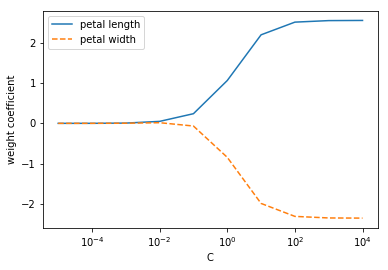

In [11]:
#空のリストを作成（重み係数、逆正則パラメータ）
weights,params = [],[]

#10個の逆正則パラメータに対応するロジスティック回帰モデルをそれぞれ処理
for c in np.arange(-5,5):
    lr = LogisticRegression(C=10**int(c), random_state=0)
    lr.fit(X_train_std,y_train)
    #重み係数を格納
    weights.append(lr.coef_[1])
    params.append(10**int(c))
    
# 重み係数をNumPy配列に変換
weights = np.array(weights)
#横軸に逆正則パラメータ、縦軸に重み係数をプロット
plt.plot(params,weights[:,0],label='petal length')
plt.plot(params,weights[:,1],linestyle='--',label='petal width')
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.legend(loc='upper left')
#横軸を対数スケールに設定
plt.xscale('log')
plt.show()